## 확률과정

### 10-1 난수 생성 

의사난수? 컴퓨터 알고리즘으로 만들어 내는 난수, 정해진 알고리즘으로 생성해내기 때문에 가짜난수라 불림

In [1]:
#numpy.random 사용 실제로는 모두 의사 난수 편의상 난수로 얘기
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
npr.rand(10)

array([0.78263435, 0.86374623, 0.92107982, 0.05178853, 0.99975023,
       0.38113179, 0.14719926, 0.0483729 , 0.81044933, 0.98147021])

In [3]:
npr.rand(5,5)

array([[0.81207707, 0.91519792, 0.74199516, 0.94812655, 0.94163805],
       [0.19122231, 0.27246094, 0.69503209, 0.41735649, 0.42233822],
       [0.15504961, 0.66359882, 0.82421838, 0.45801496, 0.61468071],
       [0.64432078, 0.69064246, 0.04230091, 0.72920865, 0.15412098],
       [0.6324684 , 0.42701932, 0.79609554, 0.55309151, 0.57473095]])

In [4]:
#rand -> [0,1)구간 
#필요한 구간으로 변환
a = 5.
b = 10.
npr.rand(10)*(b-a)+a

array([5.92593542, 7.40227791, 6.51686822, 7.98079451, 5.51206128,
       6.46529223, 5.21393485, 5.04407335, 8.94937404, 8.42055232])

In [5]:
#np 브로드캐스팅 기능으로 다차원도 가능
#(python에서 브로드캐스팅 : 조건만 만족하면 모양이 다른 배열끼리의 연산도 가능, 모양이 부족한 부분은 확장하여 연산을 수행할 수 있도록 해줌)
npr.rand(5,5)*(b-a)+a

array([[7.66469857, 9.82994051, 6.29095727, 7.9225277 , 5.66961544],
       [6.65484617, 7.05903113, 8.0407465 , 9.05294797, 5.52847549],
       [6.89600475, 5.91556637, 9.95352815, 9.82427067, 9.40652096],
       [9.22429692, 8.37698492, 5.92801476, 8.9072216 , 5.18250231],
       [8.82435488, 5.41409072, 6.44403655, 6.43061472, 8.33120943]])

In [6]:
sample_size = 500
rn1 = npr.rand(sample_size,3)
rn2 = npr.randint(0,10,sample_size)  #[0,10]사이 무작위 정수 생성
rn3 = npr.sample(size = sample_size)
a = [0,25,50,75,100]
rn4 = npr.choice(a, size = sample_size) #주어진 배열에서 무작위로 선택

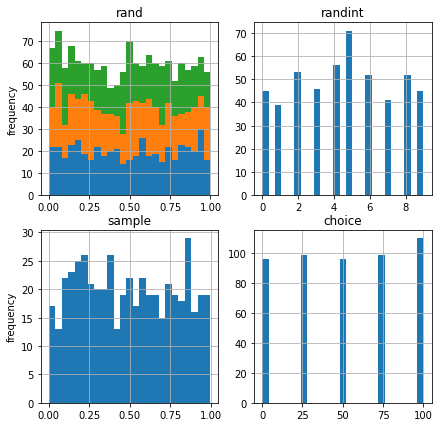

In [7]:
#그래프로 표현
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows = 2, ncols = 2,
                                         figsize = (7,7))
ax1.hist(rn1,bins = 25, stacked = True)
ax1.set_title('rand')
ax1.set_ylabel('frequency')
ax1.grid(True)

ax2.hist(rn2,bins = 25)
ax2.set_title('randint')
ax2.grid(True)

ax3.hist(rn3,bins = 25)
ax3.set_title('sample')
ax3.set_ylabel('frequency')
ax3.grid(True)

ax4.hist(rn4,bins = 25)
ax4.set_title('choice')
ax4.grid(True)

'https://numpy.org/doc/stable/reference/random/legacy.html ' 에 특정 확률 분포 따르는 난수함수 나열되어 있음

In [8]:
sample_size = 500
rn1 = npr.standard_normal(sample_size)  #표준정규분포
rn2 = npr.normal(100,20,sample_size)  # Mean = 100, sqr = 20 인 정규분포
rn3 = npr.chisquare(df = 0.5, size = sample_size) #자유도가 0.5인 카이제곱분포
rn4 = npr.poisson(lam = 1.0,size = sample_size) #람다계수가 1인 포아송분포 

포아송 분포는 외부 쇼크, 급변화 등 드물게 발생하는 사건 발생 분포를 시뮬레이션함

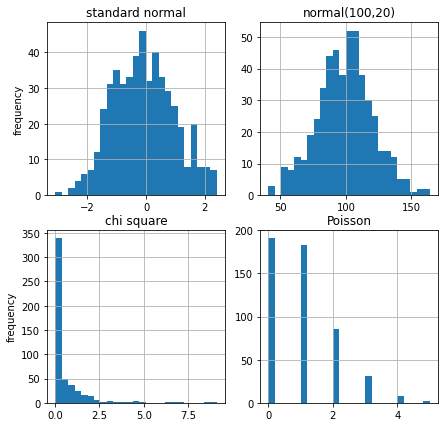

In [9]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows = 2, ncols = 2,
                                         figsize = (7,7))
ax1.hist(rn1,bins = 25)
ax1.set_title('standard normal')
ax1.set_ylabel('frequency')
ax1.grid(True)

ax2.hist(rn2,bins = 25)
ax2.set_title('normal(100,20)')
ax2.grid(True)

ax3.hist(rn3,bins = 25)
ax3.set_title('chi square')
ax3.set_ylabel('frequency')
ax3.grid(True)

ax4.hist(rn4,bins = 25)
ax4.set_title('Poisson')
ax4.grid(True)

### 10-2 Simulation (chap 16에서 더 자세히 배움)

10-2-1 확률 변수

#블랙 숄즈 머튼 모형(3장 참고)\
$ S_t = S_o*exp((r-\sigma^2/2)T+\sigma\sqrt{T}z) $

In [10]:
s0 = 100 #초기값
r = 0.05 #고정 단기 이자율
sigma = 0.25 #고정 변동성
T = 2.0 #in years
I = 10000 #난수의 수
st1 = s0*np.exp((r-sigma**2/2)*T+sigma*np.sqrt(T)*npr.standard_normal(I))

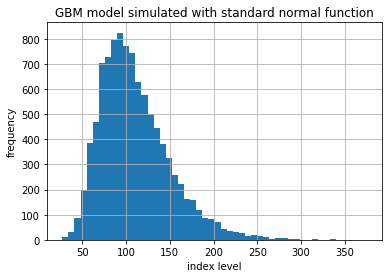

In [11]:
plt.hist(st1,bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.title('GBM model simulated with standard normal function')
plt.grid(True)

In [12]:
st2 = s0*npr.lognormal((r-0.5*sigma**2)*T,sigma*np.sqrt(T),size=I)  #정규분포 말고 로그정규분포 사용

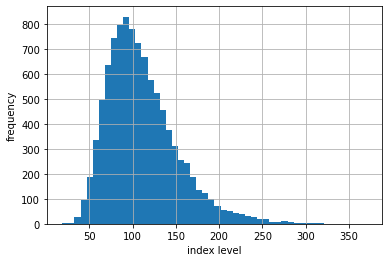

In [13]:
plt.hist(st2,bins = 50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)

In [14]:
#그림 매우 비슷함. 통계 모멘트 비교하기(같다는 거 증명)

In [15]:
import scipy.stats as scs
def print_statistics(a1,a2):
    '''필요한 통계치 출력한다.
    
    인수
    ===
    a1, a2 : ndarray 객체
        시뮬레이션 결과를 저장하는 객체
    '''
    sta1 = scs.describe(a1)
    sta2 = scs.describe(a2)
    print('%14s %14s %14s' % \
          ('statistic', 'data set 1', 'data set 2'))
    print(45 *'-')
    print('%14s %14.3f %14.3f' % ('size', sta1[0], sta2[0]))
    print('%14s %14.3f %14.3f' % ('min', sta1[1][0], sta2[1][0]))
    print('%14s %14.3f %14.3f' % ('max', sta1[1][1], sta2[1][1]))
    print('%14s %14.3f %14.3f' % ('mean', sta1[2], sta2[2]))
    print('%14s %14.3f %14.3f' % ('std',np.sqrt(sta1[3]),np.sqrt(sta2[3])))
    print('%14s %14.3f %14.3f' % ('stew', sta1[4], sta2[4]))
    print('%14s %14.3f %14.3f' % ('kurtosis', sta1[5], sta2[5]))

In [16]:
print_statistics(st1,st2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         27.276         18.718
           max        374.909        370.422
          mean        110.579        110.964
           std         40.128         40.771
          stew          1.111          1.091
      kurtosis          2.077          1.832


두개의 통계치 유사. 약간의 오차는 sampling error. 

10-2-2 확률 과정

**기하 브라운 운동 모형**

$ dS_t  = rS_tdt+\sigma S_tdZ_t $ '확률미분방정식(by BSM) \
$ St = S_{t-\Delta t}exp((r-\frac{1}{2})\Delta t + \sigma\sqrt(\Delta tZ_t)) $ 'BSM을 따르는 동적인 주가 시뮬레이션

In [17]:
I = 1000
M = 50
dt = T/M
S = np.zeros((M+1,I))
S[0] = s0
for t in range(1,M+1):
    S[t] = S[t-1]*np.exp((r-0.5*sigma**2)*dt
                        + sigma*np.sqrt(dt)*npr.standard_normal(I))

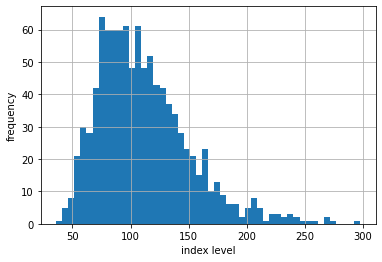

In [18]:
plt.hist(S[-1],bins = 50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)

In [19]:
print_statistics(S[-1],st2)  #거의 유사

     statistic     data set 1     data set 2
---------------------------------------------
          size       1000.000      10000.000
           min         35.842         18.718
           max        297.838        370.422
          mean        111.241        110.964
           std         39.607         40.771
          stew          1.082          1.091
      kurtosis          1.606          1.832


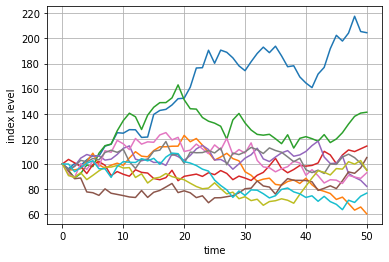

In [20]:
#경로 10개만 확인
plt.plot(S[:,:10],lw = 1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)

**제곱근 확산 모형**

단기 이자율이나 변동성 모형에 주로 사용되는 평균 회귀과정 \
그중 가장 널리 사용되는 Square-root diffusion모형 \
$ dx_t = k(\Theta -x_t)dt +\sigma\sqrt{x_t}dZ_t $  ' 제곱근 확산 확률 미분 방정식 \
$ \bar x_t = \bar x_s + k(\Theta -\bar x_s^+)\Delta t+\sigma\sqrt{\bar x_s^+}\sqrt{\Delta tz_t} $ '제곱근 확산 확률 과정의 오일러 이산화\
$ x_t = \bar x_t^+$

In [21]:
#단기 이자율 모형 시뮬레이션
x0 = 0.05
kappa = 3.0
theta = 0.02
sigma = 0.1

In [22]:
I = 10000
M = 50
dt = T/M
def srd_euler():
    xh = np.zeros((M+1,I))
    x1 = np.zeros_like(xh)
    xh[0]= x0
    x1[0]= x0
    for t in range(1,M+1):
        xh[t] = (xh[t-1]
                + kappa*(theta-np.maximum(xh[t-1],0))*dt
                + sigma*np.sqrt(np.maximum(xh[t-1],0))*np.sqrt(dt) * npr.standard_normal(I))
    x1 = np.maximum(xh,0)
    return x1

In [23]:
x1 = srd_euler()

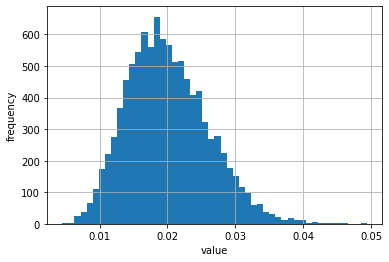

In [24]:
plt.hist(x1[-1],bins = 50)
plt.xlabel('value')
plt.ylabel('frequency')
plt.grid(True)

In [25]:
plt.plot(x1[:,:10],lw = 1.5)
plt.xlabel('time')
plt.ylabel('index level')l
plt.grid(True)  #현재 값이 장기 평균인 θ = 0.02보다 높기 때문에 drift(표류 경향)이 음수가 되고 장기평균으로 수렴하게 됨

SyntaxError: invalid syntax (<ipython-input-25-44c3d629be43>, line 3)

제곱근 확산 과정을 df = $\frac{4\Theta_k}{\sigma^2}$와 비중심 인수 $nc = \frac{4ke^{-k\Delta t}}{\sigma^2(1-e^{-k\Delta t}}x_s$ 을 가진 비중심 카이제곱분포 $X_d^{'2}$로 표현

$ x_t = \frac{\sigma^2(1-e^{-k\Delta t} )}{4k}X_d^{'2}(\frac{4ke^{-k\Delta t}}{\sigma^2(1-e^{-k\Delta t}}x_s) $ '제곱근 확산 과정의 정확한 이산화

In [26]:
def srd_exact():
    x2 = np.zeros((M+1,I))
    x2[0] = x0
    for t in range(1,M+1):
        df = 4*theta*kappa/sigma**2
        c = (sigma**2*(1-np.exp(-kappa*dt)))/(4*kappa)
        nc = (np.exp(-kappa*dt)/c)*x2[t-1]
        x2[t] = c*npr.noncentral_chisquare(df,nc,size=I)
    return x2
x2 = srd_exact()

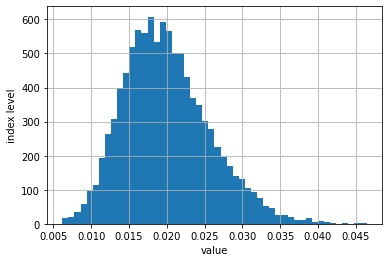

In [27]:
plt.hist(x2[-1],bins = 50)
plt.xlabel('value')
plt.ylabel('index level')
plt.grid(True)

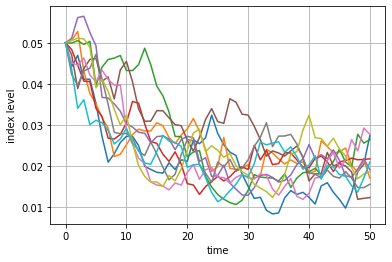

In [28]:
plt.plot(x2[:,:10],lw = 1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)

In [29]:
print_statistics(x1[-1],x2[-1])  

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min          0.005          0.006
           max          0.049          0.046
          mean          0.020          0.020
           std          0.006          0.006
          stew          0.492          0.569
      kurtosis          0.206          0.371


In [30]:
#통계치만 보면 비슷. 하지만 실제 속도면에서는 표준정규분포를 이용하는 것보다 
#비중심 카이제곱분포에서 직접 샘플링 하는 것이 계산상 부담이 크다.

#확인하기 위해 경로 늘려서 확인

In [31]:
I = 250000
%time x1 = srd_euler()

Wall time: 1.23 s


In [32]:
%time x2 = srd_exact()   #비중심 카이제곱 분포가 더 느림

Wall time: 1.35 s


In [33]:
print_statistics(x1[-1],x2[-1])
x1 = 0.0; x2 = 0.0

     statistic     data set 1     data set 2
---------------------------------------------
          size     250000.000     250000.000
           min          0.002          0.004
           max          0.063          0.059
          mean          0.020          0.020
           std          0.006          0.006
          stew          0.558          0.582
      kurtosis          0.464          0.507


**확률적 변동성 모형**

헤스톤 확률적 변동성 모형의 확률 미분 방정식 \
$ dS_t = rS_tdt+\sqrt{v_t}S_tdZ_t^1 $ \
$ dv_t = k_v(\Theta_v-v_t)dt+\sigma_v\sqrt{v_t}dZ_t^2 $ \
$ dZ_t^1dZ_t^2 = \rho $ < 두 표준 브라운 운동의 상관계수 : 레버리지 설명 가능

In [34]:
s0 = 100.
r = 0.05
v0 = 0.1
kappa = 3.0
theta = 0.25
sigma = 0.1
rho = 0.6
T = 1.0

In [35]:
#Cholesky decomposition 필요(상관관계 구하기 위해)
corr_mat = np.zeros((2,2))
corr_mat[0,:] = [1.0,rho]
corr_mat[1,:] = [rho,1.0]
cho_mat = np.linalg.cholesky(corr_mat)

cho_mat

array([[1. , 0. ],
       [0.6, 0.8]])

In [36]:
#난수 생성
M = 50
I = 10000
ran_num = npr.standard_normal((2,M+1,I))

In [37]:
#제곱근 확산 과정 모형 기반 변동성 > 상관관계 고려한 오일러 이산화 방법
dt = T/M
v = np.zeros_like(ran_num[0])
vh = np.zeros_like(v)
v[0] = v0
vh[0] = v0
for t in range(1,M+1):
    ran = np.dot(cho_mat,ran_num[:,t,:])
    vh[t] = (vh[t-1]+kappa*(theta-np.maximum(vh[t-1],0))*dt
            + sigma*np.sqrt(np.maximum(vh[t-1],0))*np.sqrt(dt)*ran[1])
v = np.maximum(vh,0)

In [38]:
#주가과정도 상관관계 고려
S = np.zeros_like(ran_num[0])
S[0] = s0
for t in range(1,M+1):
    ran = np.dot(cho_mat,ran_num[:,t,:])
    S[t] = S[t-1]*np.exp((r-0.5*v[t])*dt +
                        np.sqrt(v[t])*ran[0]*np.sqrt(dt))

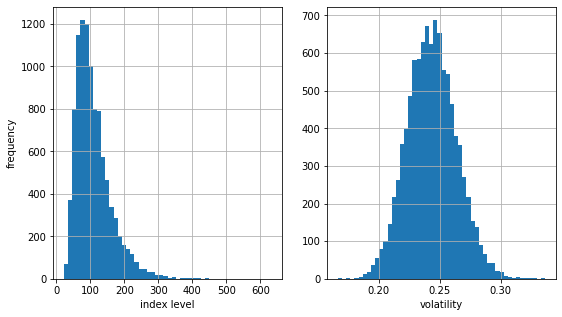

In [39]:
#v,S 시뮬레이션 결과
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (9,5))

ax1.hist(S[-1],bins = 50)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.grid(True)

ax2.hist(v[-1],bins = 50)
ax2.set_xlabel('volatility')
ax2.grid(True)

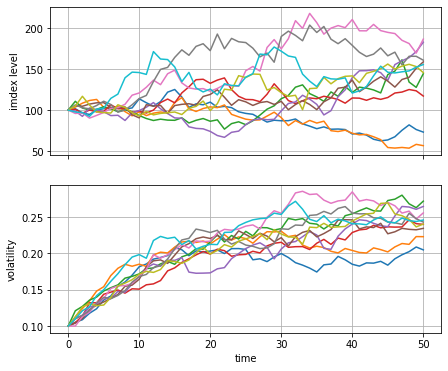

In [40]:
#10개씩 살펴보면 변동성 과정은 양의 표류경향을 보이며, θ =0.25로 수렴
fig, (ax1,ax2) = plt.subplots(2,1,sharex = True, figsize=(7,6))

ax1.plot(S[:,:10],lw = 1.5)
ax1.set_ylabel('imdex level')
ax1.grid(True)

ax2.plot(v[:,:10],lw = 1.5)
ax2.set_xlabel('time')
ax2.set_ylabel('volatility')
ax2.grid(True)

In [41]:
print_statistics(S[-1],v[-1]) #최대값이 기하브라운운동보다 큼 (변동성이 계속 지속적으로 증가했기 때문에)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         21.954          0.166
           max        632.197          0.337
          mean        109.156          0.244
           std         52.700          0.020
          stew          1.570          0.155
      kurtosis          4.470          0.064


**점프 확산**

$ dS_t = (r-r_J)S_tdt + \sigma S_tdZ_t + J_tS_tdN_t$ : 머튼의 점프 확산 모형의 확률 미분 방정식 , $N_t$ : 점프강도λ인 포아송\
$r_J ≡ \lambda(e^{u_J+\delta^2/2}-1)$ :점프의 위험 중립성을 보존하기 위한 표류계수 수정항 \
$ log(1+J_t) \approx N(log(1+\mu_J)-\frac{\delta^2}{2},\delta^2) $ < 시간t 에서 점프의 분포 ($J_t$) \
$ S_t = S_{t-\Delta t}(e^{(r-r_j-\sigma^2/2)\Delta t + \sigma\sqrt{\Delta tz_t^1}+(e^{u_J+\delta z_t^2}-1)y_t} $ : 머튼 점프 확산 모형의 오일러 이산화

In [42]:
s0 = 100.
r = 0.05
sigma = 0.2
lamb = 0.75
mu = -0.6
delta = 0.25
T = 1.0

In [43]:
#독립변수 3개 필요
M = 50
I = 10000
dt = T/M
rj = lamb*(np.exp(mu+0.5*delta**2)-1)

S = np.zeros((M+1,I))
S[0] = s0

sn1 = npr.standard_normal((M+1,I))
sn2 = npr.standard_normal((M+1,I))
poi = npr.poisson(lamb*dt,(M+1,I))

for t in range(1,M+1,1):
    S[t] = S[t-1]*(np.exp((r-rj-0.5*sigma**2)*dt
                         +sigma*np.sqrt(dt)*sn1[t])
                  +(np.exp(mu-delta*sn2[t])-1)*poi[t])
    S[t] = np.maximum(S[t],0)

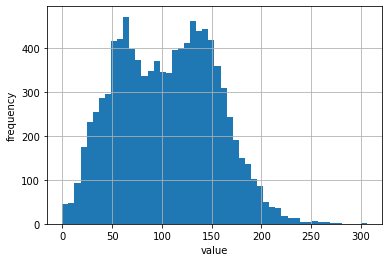

In [44]:
plt.hist(S[-1],bins = 50)
plt.xlabel('value')
plt.ylabel('frequency')
plt.grid(True)

   점프의 평군값에 큰 음수값 가정했기 때문에 주가가 전형적인 로그정규분포보다 우편향되어있음

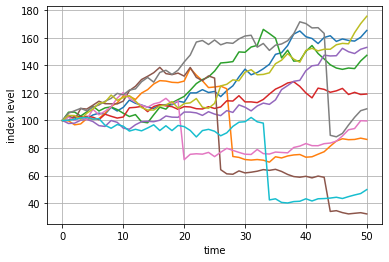

In [45]:
#주가가 아래로 점프하는 현상
plt.plot(S[:,:10],lw = 1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)

10-2-3 분산 감소

In [46]:
#정확한 비교를 위해 난수 생성기의 시드 값 고정 N(0,1)만들고 싶을 때
print("%15s %15s" %('Mean','Std. Deviation'))
print(31*'-')
for i in range(1,31,2):
    npr.seed(1000)
    sn = npr.standard_normal(i**2*10000)
    print('%15.12f %15.12f' % (sn.mean(),sn.std()))

           Mean  Std. Deviation
-------------------------------
-0.011870394558  1.008752430725
-0.002815667298  1.002729536352
-0.003847776704  1.000594044165
-0.003058113374  1.001086345326
-0.001685126538  1.001630849589
-0.001175212007  1.001347684642
-0.000803969036  1.000159081432
-0.000601970954  0.999506522127
-0.000147787693  0.999571756099
-0.000313035581  0.999646153704
-0.000178447061  0.999677277878
 0.000096501709  0.999684346792
-0.000135677013  0.999823841902
-0.000015726986  0.999906493379
-0.000039368519  1.000063091949


In [47]:
i**2*10000  #샘플이 800만개가 넘어도 원하는 수준 도달 X

8410000

In [48]:
#대조 변수법(antithetic variates) - 난수의 절반만 생성, 숫자의 부호를 반대로 한 난수를 추가시킴
sn = npr.standard_normal(int(10000/2))  #folat형태는 안댐
sn = np.concatenate((sn,-sn))
np.shape(sn)

(10000,)

In [49]:
print("%15s %15s" %('Mean','Std. Deviation'))
print(31*'-')
for i in range(1,31,2):
    npr.seed(1000)
    sn = npr.standard_normal(int(i**2*10000/2))
    sn = np.concatenate((sn,-sn))
    print('%15.12f %15.12f' % (sn.mean(),sn.std()))  #mean 정확히 0 (대칭되기 때문), but 표준편차에는 영향 X

           Mean  Std. Deviation
-------------------------------
 0.000000000000  1.009653753942
-0.000000000000  1.000413716783
 0.000000000000  1.002925061201
-0.000000000000  1.000755212673
 0.000000000000  1.001636910076
-0.000000000000  1.000726758438
-0.000000000000  1.001621265149
 0.000000000000  1.001203722778
-0.000000000000  1.000556669784
 0.000000000000  1.000113464185
-0.000000000000  0.999435175324
 0.000000000000  0.999356961431
-0.000000000000  0.999641436845
-0.000000000000  0.999642768905
-0.000000000000  0.999638303451


In [50]:
#모멘트 정합(moment matching) -> 1,2차 모멘트 같이 수정 가능
sn_new = (sn-sn.mean()/sn.std())
sn_new.mean(), sn_new.std()  #둘다 거의 만족

(-1.4426298707614401e-19, 0.9996383034511215)

In [51]:
#표준정규분포 따르는 난수 생성함수
def gen_sn(M,I,anti_paths = True, mo_match = True) :
    ''' 시뮬레이션 난수 생성 함수
    인수
    ====
    M : int
        시간 이산화 구간의 수
    I : int
        시뮬레이션 경로의 수
    anti_paths : Boolean
        대조 변수 사용 여부
    mo_moth : Boolean
        모멘트 정합 사용 여부
    '''
    if anti_paths is True :
        sn = npr.standard_normal((M+1,int(I/2)))
        sn = np.concatenate((sn,-sn),axis = 1)
    else:
        sn = npr.standard_normal((M+1,I))
    if mo_match is True:
        sn = (sn-sn.mean()/sn.std())
    return sn

### 10-3 가치평가

**10-3-1 유러피안 옵션**

$ \bar C_o = e^{-rT}\frac{1}{I}\sum_{i=1}^{I}h(\bar S_T^i) $  : 위험 중립 몬테카를로 추정법

In [52]:
s0 = 100.
r = 0.05
sigma = 0.25
T = 1.0
I = 50000

def gbm_mcs_stat(K):
    '''유러피안 콜 옵션을 BSM모형과 만기 주가의 MCS을 사용하여 가치평가
    
    인수
    ====
    K : float
        옵션의 행사가
    
    반환값
    ====
    c0 : float
        유러피안 콜 옵션 현재 가치 추정치
    '''
    sn = gen_sn(1,I)
    #만기시 주가 시뮬레이션
    st =s0*np.exp((r-0.5*sigma**2)*T + sigma*np.sqrt(T)*sn[1])
    #만기 pay-off 계산
    ht = np.maximum(st-K,0)
    #몬테카를로 추정
    c0 = np.exp(-r*T)*(1/I)*np.sum(ht)
    return c0

In [53]:
gbm_mcs_stat(K = 105.)  #콜옵션 가치

9.930548905941727

In [54]:
M = 50
def gbm_mcs_dyna(K,option = 'call'):
    ''' BSM모형 주가 MCS을 사용한
        유러피안 (콜) 옵션 가격 계산
    인수
    ====
    K : float
        옵션 행사가(양수)
    option : string
        평가하고자 하는 (콜) 옵션 유형 ('call','put')
    
    반환값
    ====
    c0 : float
        옵션 가격 추정치
    '''
    dt = T/M
    #주가 simulation
    s = np.zeros((M+1,I))
    s[0] = s0
    sn = gen_sn(M,I)
    for t in range(1,M+1):
        s[t] = s[t-1]*np.exp((r-0.5*sigma**2)*dt + sigma*np.sqrt(dt)*sn[t])
    #pay-off 계산
    if option == 'call':
        ht = np.maximum(s[-1]-K,0)
    else:
        ht = np.maximum(K-s[-1],0)
        
    c0 = np.exp(-r*T)*1/I*np.sum(ht)
    
    return c0

In [55]:
gbm_mcs_dyna(K=110.,option = 'call'), gbm_mcs_dyna(K = 110.,option = 'put')

(7.937601296974633, 12.634720657052117)

In [56]:
#BSM가치평가 공식으로 계산한 값과 얼마나 일치하는지 확인
from bsm_functions import bsm_call_value

stat_res = []
dyna_res = []
anal_res = []
k_list = np.arange(80.,120.1,5.)
np.random.seed(200000)

for K in k_list:
    stat_res.append(gbm_mcs_stat(K))
    dyna_res.append(gbm_mcs_dyna(K))
    anal_res.append(bsm_call_value(s0,K,T,r,sigma))

stat_res = np.array(stat_res)
dyna_res = np.array(dyna_res)
anal_res = np.array(anal_res)

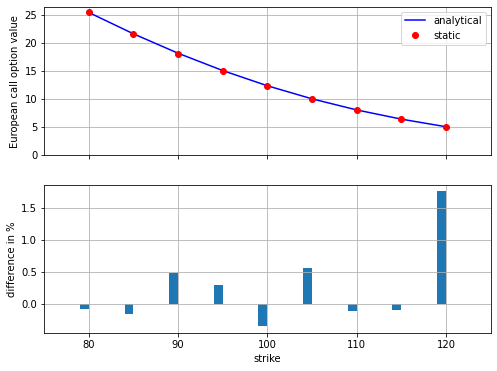

In [57]:
#비교(해석해, 정적 시뮬레이션 방식)
fig, (ax1,ax2) = plt.subplots(2,1,sharex = True, figsize = (8,6))

ax1.plot(k_list,anal_res,'b',label='analytical')
ax1.plot(k_list,stat_res,'ro',label = 'static')
ax1.set_ylabel('European call option value')
ax1.grid(True)
ax1.legend(loc=0)
ax1.set_ylim(ymin = 0)

wi = 1.0
ax2.bar(k_list-wi/2,(anal_res-stat_res)/anal_res*100,wi)
ax2.set_xlabel('strike')
ax2.set_ylabel('difference in %')
ax2.set_xlim(left =75,right = 125)
ax2.grid(True)

#오차 2%이하

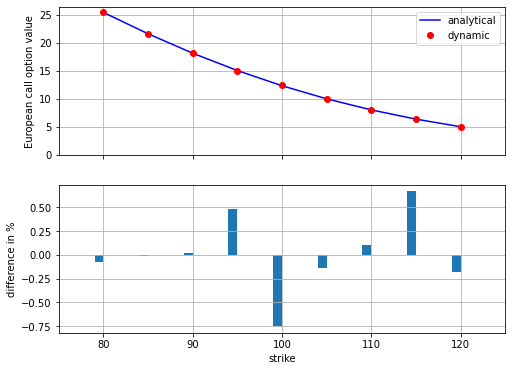

In [58]:
#비교(해석해, 동적 시뮬레이션 방식)
fig, (ax1,ax2) = plt.subplots(2,1,sharex = True, figsize = (8,6))

ax1.plot(k_list,anal_res,'b',label='analytical')
ax1.plot(k_list,dyna_res,'ro',label = 'dynamic')
ax1.set_ylabel('European call option value')
ax1.grid(True)
ax1.legend(loc=0)
ax1.set_ylim(ymin = 0)

wi = 1.0
ax2.bar(k_list-wi/2,(anal_res-dyna_res)/anal_res*100,wi)
ax2.set_xlabel('strike')
ax2.set_ylabel('difference in %')
ax2.set_xlim(left =75,right = 125)
ax2.grid(True)

#오차 1%이하

**10-3-2 아메리칸 옵션**

$ V_0 = \sup_{\tau\in{0,\Delta t,2\Delta t,\cdot\cdot\cdot,T}}e^{-rTE_0^Q(h_\tau(S_\tau))} $ : 아메리칸 옵션 가격 계산을 위한 최적 정지 문제 \

LSM 방법 사용\
$ \min_{\alpha_{i,t},\cdot\cdot\cdot,\alpha_{D,t}} = \frac{1}{I}\sum_{i=1}^{I}(Y_{t,i}-\sum_{d=I}^{D}\alpha_{d,t}\cdot b_d(S_{t,i}))^2 $ : 아메리칸 옵션 가치 계산을 위한 최소자승회귀법(LSM)

In [59]:
def gbm_mcs_amer(K,option = 'call'):
    '''LSM Algorithm과 BSM_MCS사용한 아메리칸 옵션 가치평가
    
    인수
    ====
    K : float
        옵션 행사가(양수)
    option : string
        평가하고자 하는 옵션의 유형('call','put')
        
    반환값
    ====
    c0 : float
        아메리칸 콜 옵션 가격 추정치
    '''
    dt = T/M
    df = np.exp(-r*dt)
    
    #stock simulation
    s = np.zeros((M+1,I))
    s[0] = s0
    sn = gen_sn(M,I)
    for t in range(1,M+1):
        s[t] = s[t-1]*np.exp((r-0.5*sigma**2)*dt +sigma*np.sqrt(dt)*sn[t])
    
    #pay-off
    if option == 'call':
        h = np.maximum(s-K,0)
    else:
        h = np.maximum(K-s,0)
    
    #LSM Algorithm
    V = np.copy(h)
    for t in range(M-1,0,-1):
        reg = np.polyfit(s[t],V[t+1]*df,7)
        C = np.polyval(reg,s[t])
        V[t] = np.where(C > h[t],V[t+1]*df,h[t])
    
    #Monte Carlo Estimation
    c0 = df*1/I*np.sum(V[1])
    
    return c0

In [60]:
gbm_mcs_amer(110.,option='call'), gbm_mcs_amer(110.,option = 'put')

(7.797453011957779, 13.613393220495649)

In [61]:
#유러피안 옵션 가치는 아메리칸 옵션 가치의 하한. |유러피안-아메리칸 옵션 가치| = 조기 행사 프리미엄.
#조기 행사 프리미엄 추정(put option)
euro_res = []
amer_res = []
k_list = np.arange(80.,120.1,5.)

for K in k_list :
    euro_res.append(gbm_mcs_dyna(K,option = 'put'))
    amer_res.append(gbm_mcs_amer(K,option = 'put'))
euro_res = np.array(euro_res)
amer_res = np.array(amer_res)

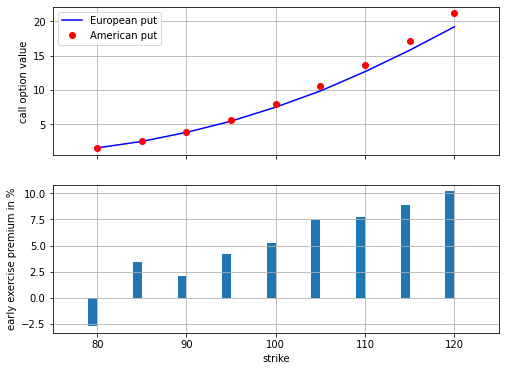

In [62]:
fig,(ax1,ax2) = plt.subplots(2,1,sharex = True, figsize =(8,6))

ax1.plot(k_list,euro_res,'b',label = 'European put')
ax1.plot(k_list,amer_res,'ro',label = 'American put')
ax1.set_ylabel('call option value')
ax1.grid(True)
ax1.legend(loc = 0)

wi = 1.0
ax2.bar(k_list-wi/2,(amer_res-euro_res)/euro_res*100,wi)
ax2.set_xlabel('strike')
ax2.set_ylabel('early exercise premium in %')
ax2.set_xlim(left = 75, right = 125)
ax2.grid(True)

#배당을 고려하지 않았기 때문에 Call Option은 조기 행사 프리미엄 X

### 10-4 위험 측도

**10-4-1 VaR**

In [63]:
s0 = 100
r = 0.05
sigma = 0.25
T = 30/365.
I = 10000
st = s0*np.exp((r-0.5*sigma**2)*T + sigma*np.sqrt(T)*npr.standard_normal(I))

In [64]:
#큰 손실부터 큰 수익까지 순서대로 정렬
R_gbm = np.sort(st-s0)

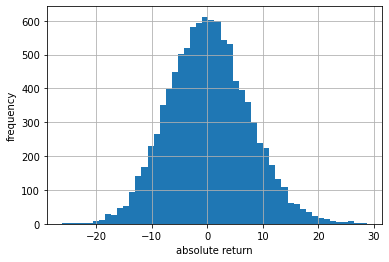

In [65]:
plt.hist(R_gbm,bins = 50)
plt.xlabel('absolute return')
plt.ylabel('frequency')
plt.grid(True)

In [66]:
percs = [0.01,0.1,1.,2.5,5.0,10.0] #유의수준
var = scs.scoreatpercentile(R_gbm,percs)
print("%16s %16s" % ('Confidence Level','Value-at-Risk'))
print('-'*33)
for pair in zip(percs,var):
    print("%16.2f %16.3f" % (100-pair[0],-pair[1]))

Confidence Level    Value-at-Risk
---------------------------------
           99.99           26.072
           99.90           20.175
           99.00           15.753
           97.50           13.265
           95.00           11.298
           90.00            8.942


In [68]:
#머튼의 점프확산모형 동적으로 시뮬레이션
dt = 30./365/M
rj = lamb * (np.exp(mu+0.5*delta**2)-1)
s = np.zeros((M+1,I))
s[0] = s0
sn1 = npr.standard_normal((M+1,I))
sn2 = npr.standard_normal((M+1,I))
poi = npr.poisson(lamb*dt,(M+1,I))

for t in range(1,M+1,1):
    s[t] = s[t-1]*(np.exp((r-rj-0.5*sigma**2)*dt
                         + sigma*np.sqrt(dt)*sn1[t])
                  +(np.exp(mu+delta*sn2[t])-1)*poi[t])
    s[t] = np.maximum(s[t],0)

In [69]:
R_jd = np.sort(s[-1]-s0)

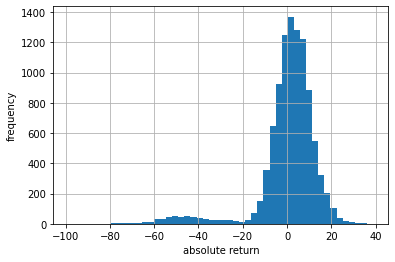

In [70]:
#점프요인 음수이므로 손익은 양봉(bimodel)분포와 유사. 정규분포 관점에선 left fat tail
plt.hist(R_jd,bins = 50)
plt.xlabel('absolute return')
plt.ylabel('frequency')
plt.grid(True)

In [72]:
#유의수준 0.1, 30일 VaR : 결과 동일, 0.01은 기하브라운 운동 모형의 세배 이상
percs = [0.01,0.1,1.,2.5,5.0,10.0] #유의수준
var = scs.scoreatpercentile(R_jd,percs)
print("%16s %16s" % ('Confidence Level','Value-at-Risk'))
print('-'*33)
for pair in zip(percs,var):
    print("%16.2f %16.3f" % (100-pair[0],-pair[1]))

Confidence Level    Value-at-Risk
---------------------------------
           99.99           89.311
           99.90           71.611
           99.00           55.679
           97.50           46.502
           95.00           26.649
           90.00            8.982


> Tail Risk 포착 못하는 문제 나타냄

In [73]:
#시각적 비교
percs = list(np.arange(0.0,10.1,0.1))
gbm_var = scs.scoreatpercentile(R_gbm,percs)
jd_var = scs.scoreatpercentile(R_jd,percs)

(-103.08001070358279, 0.0)

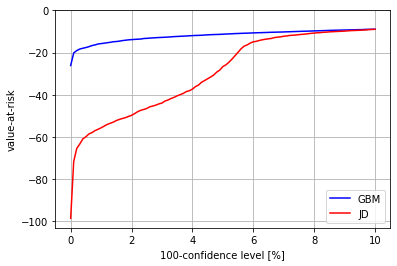

In [74]:
plt.plot(percs,gbm_var,'b',lw = 1.5, label = 'GBM')
plt.plot(percs,jd_var, 'r',lw = 1.5 , label = 'JD')
plt.legend(loc = 4)
plt.xlabel('100-confidence level [%]')
plt.ylabel('value-at-risk')
plt.grid(True)
plt.ylim(ymax = 0.0)

**10-4-2 CVA(Credit Value Adjustment)** \
신용VaR에서 파생됨. 파산의 경우 부도 확률과 손실 수준 두가지 가정 필요

In [75]:
s0 = 100.
r = 0.05
sigma = 0.2
T = 1.
I = 100000
st = s0*np.exp((r-0.5*sigma**2)*T + sigma*np.sqrt(T)*npr.standard_normal(I))

In [76]:
L = 0.5  #손실수준
p = 0.01 #부도확률

In [78]:
 #부도 시나리오 (한번만 발생)
D = npr.poisson(p*T,I)
D = np.where(D > 1, 1, D)

In [79]:
np.exp(-r*T)*1/I*np.sum(st)  #발생안했을 경우 위험 중립 측도 하에 미래 주가지수 = 자산의 현재 가치

100.05601203222723

In [80]:
CVaR = np.exp(-r*T)*1/I*np.sum(L*D*st)
CVaR #신용 VaR

0.4848852171518643

In [83]:
#신용 위험을 조정한 자산의 현재가치
s0_CVA = np.exp(-r*T)*1/I*np.sum((1-L*D)*st)

In [84]:
s0_CVA

99.57112681507536

In [85]:
s0_adj = s0-CVaR
s0_adj  #s0_CVA와 거의 같음

99.51511478284813

In [86]:
#손실 약 1000회 발생 > 가정했던 부도확률 1%와 일치
np.count_nonzero(L*D*st)

957

(0.0, 175.0)

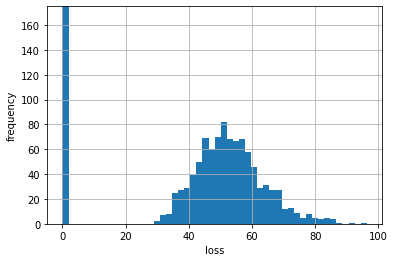

In [88]:
#부도로 인한 손실 분포
plt.hist(L*D*st,bins = 50)
plt.xlabel('loss')
plt.ylabel('frequency')
plt.grid(True)
plt.ylim(ymax = 175)

In [91]:
#유러피안 콜 옵션 가치 계산
K = 100.
ht = np.maximum(st-K,0)
c0 = np.exp(-r*T)*1/I*np.sum(ht)
c0

10.445694798136055

In [92]:
CVaR = np.exp(-r*T)*1/I*np.sum(L*D*ht)
CVaR #위와 같은 가정 하의 신용VaR > 5%

0.05374297032992917

In [93]:
#조정된 옵션 가치 > 5%정도 낮아짐
c0_CVA = np.exp(-r*T)*1/I*np.sum((1-L*D)*ht)
c0_CVA

10.391951827806125

In [94]:
#옵션의 경우 손실 횟수 약 500회 (because 만기시 그자체로 0이 될 확률 있기에)
np.count_nonzero(L*D*ht) #손실 횟수

574

In [95]:
np.count_nonzero(D) #부도 횟수

957

In [96]:
I - np.count_nonzero(ht) #페이오프 없는 경우

43769

(0.0, 350.0)

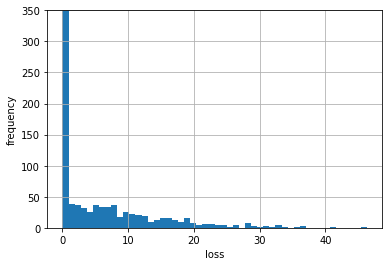

In [97]:
plt.hist(L*D*ht,bins = 50)
plt.xlabel('loss')
plt.ylabel('frequency')
plt.grid(True)
plt.ylim(ymax = 350)

계산량 多요구 > numpy도 좋아보임.(벡터화 연산에 따른 코드 가독성 및 간결성)